
# MSDS696_C70_Data Science Practicum II 
## Dilyor Mikhidinov
Using Convolutional Neural Networks to classify MRI Brain Images.

In [1]:
#importing neccessary libraries:
import numpy as np 
import pandas as pd
import os

#ML libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, InputLayer, Reshape, Conv1D, MaxPool1D, SeparableConv2D
from tensorflow.keras.applications import MobileNetV2, VGG19, InceptionV3
from keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory as pull

In [2]:
import os
print(os.listdir("dataset")) #folder where the dataset is located
classes = os.listdir("dataset")

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [3]:
#Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image

#### Checking if all the libraries are working properly. I have had very big issues with installing tensorflow_gpu and openCV

In [4]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
import cv2

Next I'm going to create seperate directory to manage labelled data. For fulfilling this task I am using splitfolders

# Data Preprocessing

### Image Augmentation

Next I am going to use one of the powerful tools of tensorflow.keras called "ImageDataGenerator". This function allows us to take the path to a directory and generate batches of augmented data. Augmentation is important step in almost every Deep learning analysis. Since it allows to modify the existing data we are using in multiple manners so that the trained algorithm becomes capable of generating patterns for even more variety of images. The only case that Augmentation might not be applicable is when the goal is for example to predict the road signs for self driving cars. Signs are always fixed and do not appear for example in vertically flipped way in reality

#### First let's take a look at the dataset distribution

In [7]:
# creating variables and saving the number of files in each dataset class folder
 
mild = './dataset/Mild_Demented'
moderate = './dataset/Moderate_Demented'
non = './dataset/Non_Demented'
very_mild = './dataset/Very_Mild_Demented'

count_mild = 0
count_moderate = 0
count_non = 0
count_very_mild = 0

for path in os.listdir(mild):
    # check if current path is a file
    if os.path.isfile(os.path.join(mild, path)):
        count_mild += 1
        
for path in os.listdir(moderate):
    if os.path.isfile(os.path.join(moderate, path)):
        count_moderate += 1
        
for path in os.listdir(non):
    if os.path.isfile(os.path.join(non, path)):
        count_non += 1
        
for path in os.listdir(very_mild):
    if os.path.isfile(os.path.join(very_mild, path)):
        count_very_mild += 1

In [8]:
#Plotly visualization
size = [count_mild,count_moderate,count_non,count_very_mild]
fig = px.bar(y=size, x=classes, text_auto='.2s',
             labels={'x':'Types of MRI Images', 'y':'Number of Images'},
             title="Distribution of images in dataset in all 4 classes")
fig.show()

In [10]:
import imgaug.augmenters as iaa
import glob

In [11]:
images = []
images_path = glob.glob("./dataset/Moderate_Demented/*.jpg")
for img_path in images_path:
    img = cv2.imread(img_path)
    images.append(img)

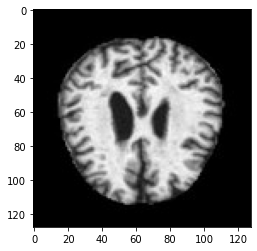

In [12]:
imgplot = plt.imshow(images[1])

#### Let's Proceed to Image Augmentation and balance the number of images in the dataset

In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#following will the property of the new augmented images:
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2) 

#### Mild Demented Image Augmentation 

In [14]:
images_path = glob.glob("./dataset/Mild_Demented/*.jpg")

for f in images_path:
    img = load_img(f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='./dataset/Mild_Demented',  
                      save_prefix ='mild', save_format ='jpeg'):
        i += 1
        if i > 5: 
            break

#### Moderete Demented Image Augmentation 

In [32]:
images_path = glob.glob("./dataset/Moderate_Demented/*.jpg")

for f in images_path:
    img = load_img(f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='./dataset/Moderate_Demented',  
                      save_prefix ='moderate', save_format ='jpeg'):
        i += 1
        if i > 5: 
            break

#### Non Demented Image Augmentation 

In [ ]:
images_path = glob.glob("./dataset/Non_Demented/*.jpg")

for f in images_path:
    img = load_img(f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='./dataset/Non_Demented',  
                      save_prefix ='non', save_format ='jpeg'):
        i += 1
        if i > 5: 
            break

#### Very Mild Demented Demented Image Augmentation 

In [ ]:
images_path = glob.glob("./dataset/Very_Mild_Demented/*.jpg")

for f in images_path:
    img = load_img(f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 5 new augmented images 
    for batch in datagen.flow(x, batch_size = 1, 
                      save_to_dir ='./dataset/Very_Mild_Demented',  
                      save_prefix ='verymild', save_format ='jpeg'):
        i += 1
        if i > 5: 
            break

Now we used Data Augmentation and generated some new modified images the dataset looks much balanced between different image classes

### Split Folders

In [35]:
#Now I am creating a work folder where I will be splitting dataset into training,
#testing and validation folders:

import splitfolders
splitfolders.ratio('dataset', output="work", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 20649 files [01:30, 227.11 files/s]


In [36]:
height = 128
width = 128
train_data = pull("./work/train",seed=123,image_size=(height, width),batch_size=64)

test_data = pull("./work/test",seed=123,image_size=(height, width),batch_size=64)

val_data = pull("./work/val",seed=123,image_size=(height, width),batch_size=64)

Found 16517 files belonging to 4 classes.
Found 2069 files belonging to 4 classes.
Found 2063 files belonging to 4 classes.


## Some Visualizations

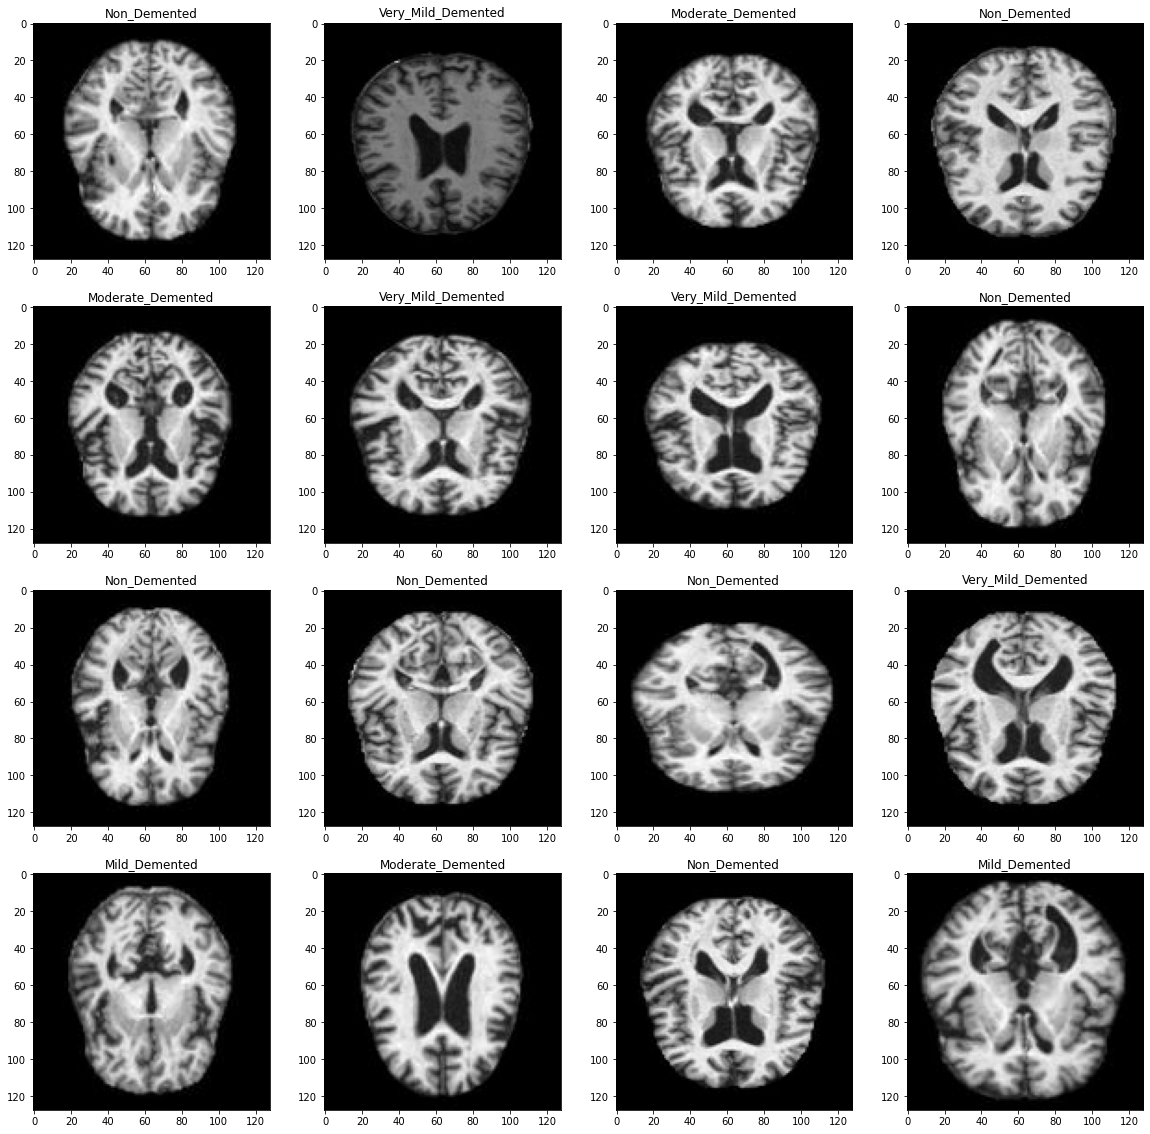

In [37]:
plt.figure(figsize=(20, 20))
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])

#### Let's now look at the distribution of images in 4 classes within training folder

In [9]:
mild = './work/train/Mild_Demented'
moderate = './work/train/Moderate_Demented'
non = './work/train/Non_Demented'
very_mild = './work/train/Very_Mild_Demented'

count_mild = 0
count_moderate = 0
count_non = 0
count_very_mild = 0

for path in os.listdir(mild):
    # check if current path is a file
    if os.path.isfile(os.path.join(mild, path)):
        count_mild += 1
        
for path in os.listdir(moderate):
    # check if current path is a file
    if os.path.isfile(os.path.join(moderate, path)):
        count_moderate += 1
        
for path in os.listdir(non):
    # check if current path is a file
    if os.path.isfile(os.path.join(non, path)):
        count_non += 1
        
for path in os.listdir(very_mild):
    # check if current path is a file
    if os.path.isfile(os.path.join(very_mild, path)):
        count_very_mild += 1

print('File count:', count_mild)

File count: 4057


In [10]:
#Plotly visualization
size = [count_mild,count_moderate,count_non,count_very_mild]
fig = px.bar(y=size, x=classes, text_auto='.2s',
             labels={'x':'Types of MRI Images', 'y':'Number of Images'},
             title="Distribution of Training images in dataset in all 4 classes after Image Augmentation")
fig.show()

## Looking at different CNN models

During the project timeline I viewed different CNN models and checked their performances with evaluation metrics. And from the analysis I selected top 3 best performing models: DS-CNN, VGG19-InceptionV3

#### Conv2d Model 1

In [41]:
input_length = 128,128,3

model_1 = Sequential()
model_1.add(Conv2D(64,(3,3),strides =(1,1),  padding='valid', activation='relu',input_shape=(128,128,3)))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(32,(3,3), activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.2))

model_1.add(SeparableConv2D(16,(3,3),activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Flatten())
model_1.add(Dense(16))

model_1.add(Dense(4,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model_1.compile(optimizer= opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [42]:
history = model_1.fit(train_data,epochs=50,validation_data = val_data, batch_size=64, verbose=1)

Epoch 1/50
259/259 [==============================] - 26s 82ms/step - loss: 2.0915 - accuracy: 0.3967 - val_loss: 1.0015 - val_accuracy: 0.5919
Epoch 2/50
259/259 [==============================] - 18s 70ms/step - loss: 0.9674 - accuracy: 0.5892 - val_loss: 0.8500 - val_accuracy: 0.6587
Epoch 3/50
259/259 [==============================] - 43s 166ms/step - loss: 0.8718 - accuracy: 0.6336 - val_loss: 0.7601 - val_accuracy: 0.7038
Epoch 4/50
259/259 [==============================] - 68s 260ms/step - loss: 0.8177 - accuracy: 0.6600 - val_loss: 0.7350 - val_accuracy: 0.7009
Epoch 5/50
259/259 [==============================] - 67s 260ms/step - loss: 0.7672 - accuracy: 0.6767 - val_loss: 0.7193 - val_accuracy: 0.7179
Epoch 6/50
259/259 [==============================] - 69s 268ms/step - loss: 0.7068 - accuracy: 0.7044 - val_loss: 0.6774 - val_accuracy: 0.7159
Epoch 7/50
259/259 [==============================] - 68s 263ms/step - loss: 0.6664 - accuracy: 0.7196 - val_loss: 0.6155 - val_accu

In [43]:
model1_s = 'model1_train.h5'
model_1.save(model1_s)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=history.history['val_accuracy'], y=random_y0,
                    mode='lines',
                    name='lines'))


fig.show()

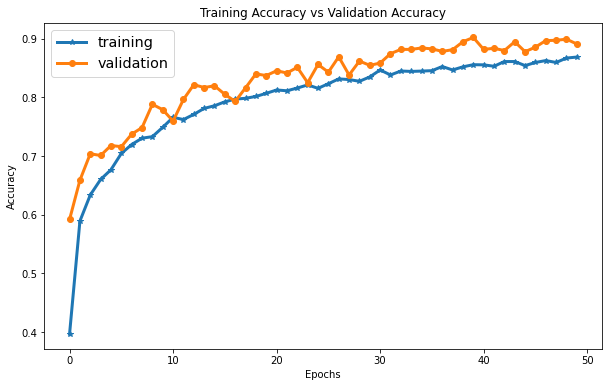

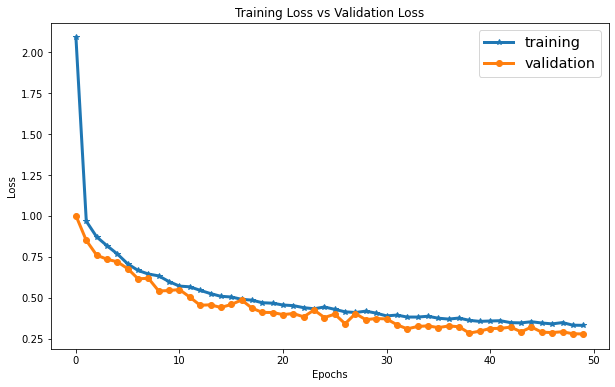

In [86]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

In [46]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.8686807751655579
Training Loss: 0.3306235074996948
Validation Accuracy: 0.9020843505859375
Validation Loss: 0.27783992886543274


As we can see first Model 1 performaned not too bad on training

#### Conv2D Model 2

In [47]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128, 3)))
model_2.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model_2.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model_2.add(keras.layers.Dropout(0.20))

model_2.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model_2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model_2.add(keras.layers.Dropout(0.25))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
#model_2.add(keras.layers.Dense(64,"relu"))
model_2.add(keras.layers.Dense(4,"sigmoid"))
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)       

In [48]:
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [49]:
history2 = model_2.fit(train_data,validation_data=val_data,epochs=50, batch_size=64, verbose=1)

Epoch 1/50
259/259 [==============================] - 12s 44ms/step - loss: 1.1412 - accuracy: 0.5580 - val_loss: 0.6041 - val_accuracy: 0.7557
Epoch 2/50
259/259 [==============================] - 12s 44ms/step - loss: 0.5443 - accuracy: 0.7678 - val_loss: 0.4400 - val_accuracy: 0.8216
Epoch 3/50
259/259 [==============================] - 12s 44ms/step - loss: 0.4114 - accuracy: 0.8279 - val_loss: 0.3339 - val_accuracy: 0.8817
Epoch 4/50
259/259 [==============================] - 12s 44ms/step - loss: 0.3134 - accuracy: 0.8726 - val_loss: 0.2923 - val_accuracy: 0.8880
Epoch 5/50
259/259 [==============================] - 12s 44ms/step - loss: 0.2506 - accuracy: 0.9011 - val_loss: 0.2490 - val_accuracy: 0.8997
Epoch 6/50
259/259 [==============================] - 11s 44ms/step - loss: 0.2164 - accuracy: 0.9151 - val_loss: 0.2124 - val_accuracy: 0.9161
Epoch 7/50
259/259 [==============================] - 12s 44ms/step - loss: 0.1683 - accuracy: 0.9342 - val_loss: 0.2054 - val_accuracy:

In [50]:
model2_s = 'model2_train.h5'
model_2.save(model2_s)

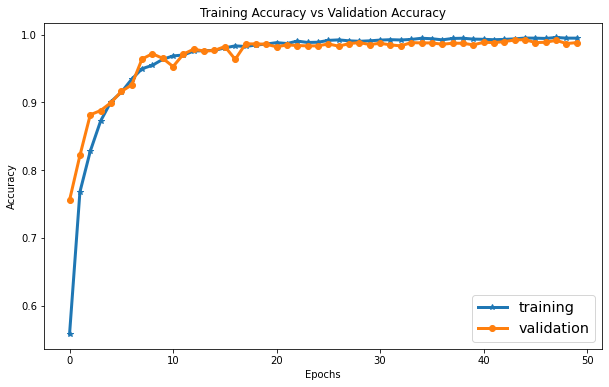

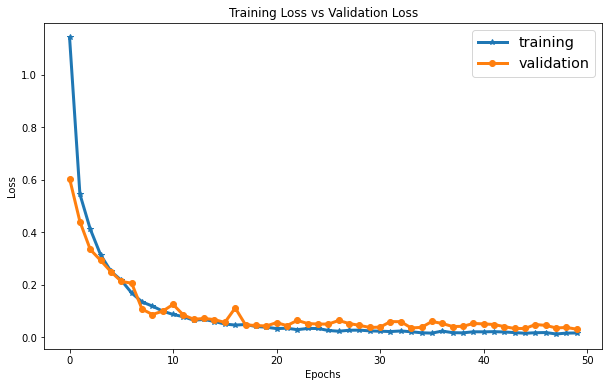

In [51]:
visualize_training(history2)

In [52]:
accuracy = history2.history['accuracy']
loss = history2.history['loss']
val_accuracy = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.995943546295166
Training Loss: 0.01216209214180708
Validation Accuracy: 0.9927290081977844
Validation Loss: 0.03030194155871868


## VGG19 Model

In [53]:
vgg_model = Sequential()
vgg_model.add(VGG19(include_top=False,weights='imagenet', input_shape=(128, 128, 3)))
vgg_model.add(Flatten())
vgg_model.add(Dense(64,activation='relu'))
vgg_model.add(Dense(16,activation='relu'))
vgg_model.add(Dense(4,activation = 'softmax'))

#vgg_model.layers[0].trainable = False

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
vgg_model.compile(optimizer= opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
Total params: 20,549,844
Trainable params: 20,549,844
Non-trainable params: 0
_________________________________________________________________


In [54]:
vgg_history = vgg_model.fit(train_data,epochs=50,validation_data = val_data,verbose=1)

Epoch 1/50
259/259 [==============================] - 95s 354ms/step - loss: 2.3667 - accuracy: 0.2585 - val_loss: 1.3829 - val_accuracy: 0.2642
Epoch 2/50
259/259 [==============================] - 90s 348ms/step - loss: 1.1679 - accuracy: 0.4495 - val_loss: 0.9779 - val_accuracy: 0.5502
Epoch 3/50
259/259 [==============================] - 91s 349ms/step - loss: 0.8422 - accuracy: 0.6163 - val_loss: 0.7985 - val_accuracy: 0.6287
Epoch 4/50
259/259 [==============================] - 91s 349ms/step - loss: 0.6621 - accuracy: 0.6907 - val_loss: 0.7520 - val_accuracy: 0.6738
Epoch 5/50
259/259 [==============================] - 91s 350ms/step - loss: 0.6022 - accuracy: 0.7232 - val_loss: 0.6791 - val_accuracy: 0.6849
Epoch 6/50
259/259 [==============================] - 91s 349ms/step - loss: 0.5427 - accuracy: 0.7520 - val_loss: 0.5981 - val_accuracy: 0.7261
Epoch 7/50
259/259 [==============================] - 90s 349ms/step - loss: 0.5017 - accuracy: 0.7736 - val_loss: 0.5022 - val_ac

In [55]:
vgg_model_s = 'vgg_train.h5'
vgg_model.save(vgg_model_s)

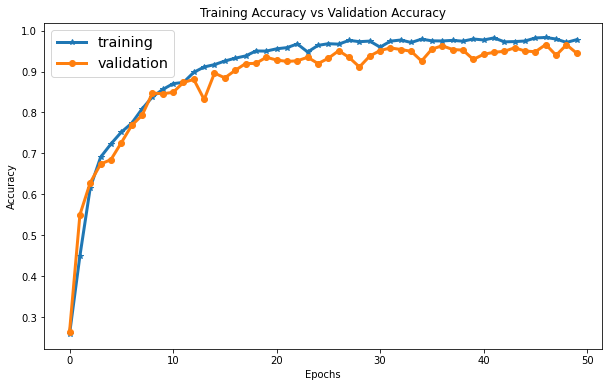

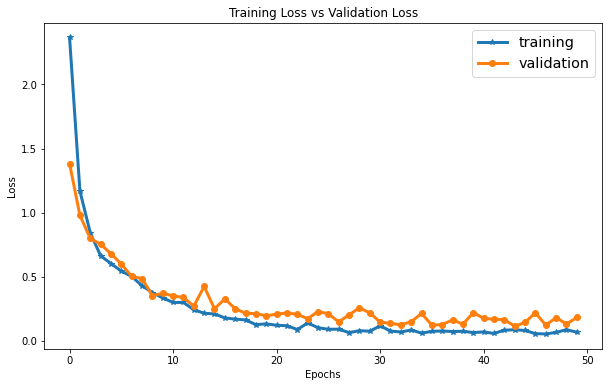

In [56]:
visualize_training(vgg_history)

In [57]:
accuracy = vgg_history.history['accuracy']
loss = vgg_history.history['loss']
val_accuracy = vgg_history.history['val_accuracy']
val_loss = vgg_history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.9834110140800476
Training Loss: 0.05231398344039917
Validation Accuracy: 0.9660688042640686
Validation Loss: 0.11205992847681046


VGG19 Model is also performing incredibly well!

## Inception Model

In [58]:
inc_model = Sequential()
inc_model.add(InceptionV3(include_top=False, weights='imagenet', input_shape=(128, 128, 3)))
inc_model.add(Flatten())
inc_model.add(Dense(64,activation='relu'))
vgg_model.add(Dense(16,activation='relu'))
inc_model.add(Dense(4,activation = 'softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.7, beta_2=0.8)
inc_model.compile(optimizer= opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
inc_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                524352    
                                                                 
 dense_9 (Dense)             (None, 4)                 260       
                                                                 
Total params: 22,327,396
Trainable params: 22,292,964
Non-trainable params: 34,432
_________________________________________________________________


In [59]:
inc_history = inc_model.fit(train_data,epochs=50,validation_data = val_data,verbose=1)

Epoch 1/50
259/259 [==============================] - 57s 189ms/step - loss: 0.5803 - accuracy: 0.7612 - val_loss: 80.8907 - val_accuracy: 0.3296
Epoch 2/50
259/259 [==============================] - 47s 180ms/step - loss: 0.2359 - accuracy: 0.9160 - val_loss: 1.0237 - val_accuracy: 0.7179
Epoch 3/50
259/259 [==============================] - 48s 185ms/step - loss: 0.1433 - accuracy: 0.9527 - val_loss: 17.8383 - val_accuracy: 0.7033
Epoch 4/50
259/259 [==============================] - 47s 181ms/step - loss: 0.1151 - accuracy: 0.9672 - val_loss: 1.9834 - val_accuracy: 0.7222
Epoch 5/50
259/259 [==============================] - 47s 179ms/step - loss: 0.0945 - accuracy: 0.9739 - val_loss: 0.7402 - val_accuracy: 0.9132
Epoch 6/50
259/259 [==============================] - 47s 182ms/step - loss: 0.0650 - accuracy: 0.9814 - val_loss: 1.3651 - val_accuracy: 0.7998
Epoch 7/50
259/259 [==============================] - 47s 180ms/step - loss: 0.0750 - accuracy: 0.9802 - val_loss: 0.6066 - val_

In [63]:
inc_model_s = 'inceptionv3_train.h5'
inc_model.save(inc_model_s)

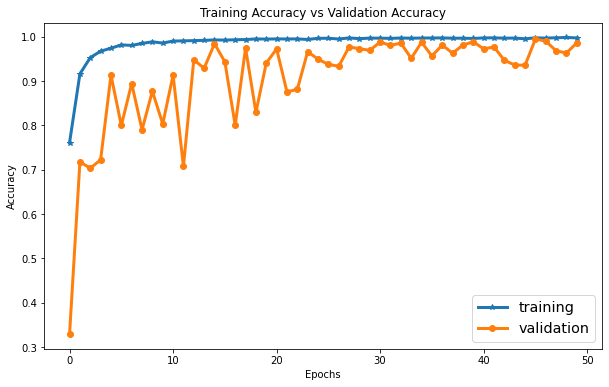

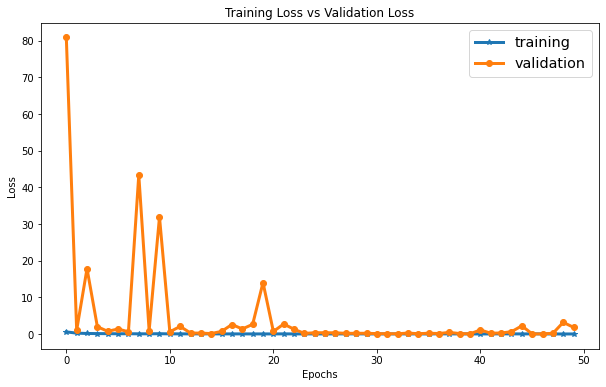

In [70]:
visualize_training(inc_history)

In [65]:
accuracy = inc_history.history['accuracy']
loss = inc_history.history['loss']
val_accuracy = inc_history.history['val_accuracy']
val_loss = inc_history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.9981231689453125
Training Loss: 0.009340698830783367
Validation Accuracy: 0.9946679472923279
Validation Loss: 0.028861040249466896


Looks good!

## Evaluating Models on Test Dataset
After using model.evaluate function I am looping through some samples from the testing dataset and vizualizing them and checking on accuracy of model

#### Conv2D Model 1 evaluation

In [71]:
loss, accuracy = model_1.evaluate(test_data)

33/33 [==============================] - 2s 56ms/step - loss: 0.2864 - accuracy: 0.8884


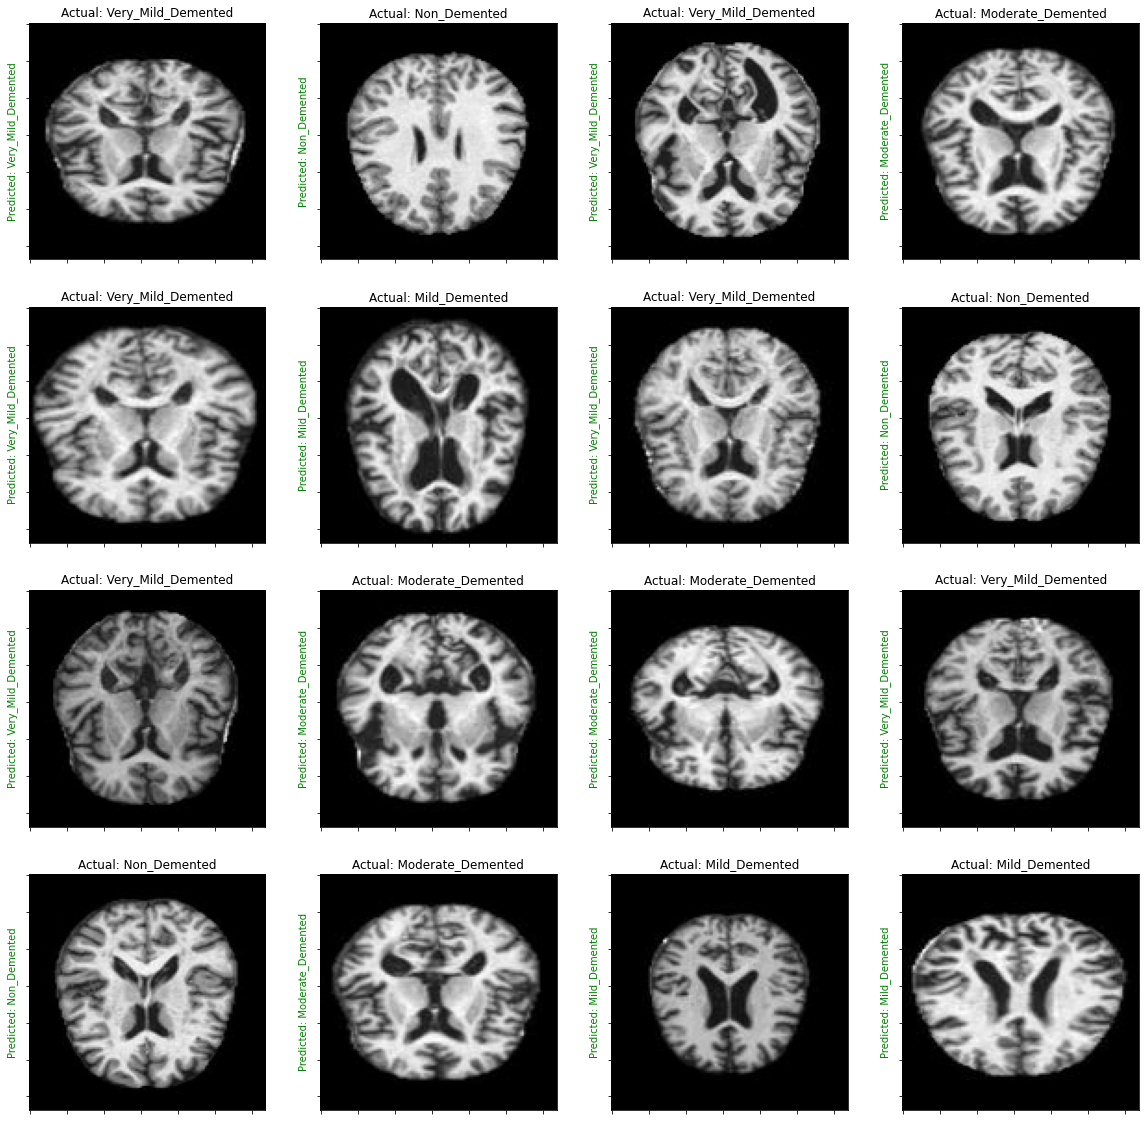

In [72]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model_1.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(classes[labels[i]]==classes[np.argmax(score)]):
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

#### Conv2D Model 2 Evaluation

In [73]:
loss, accuracy = model_2.evaluate(test_data)

33/33 [==============================] - 1s 30ms/step - loss: 0.0313 - accuracy: 0.9918


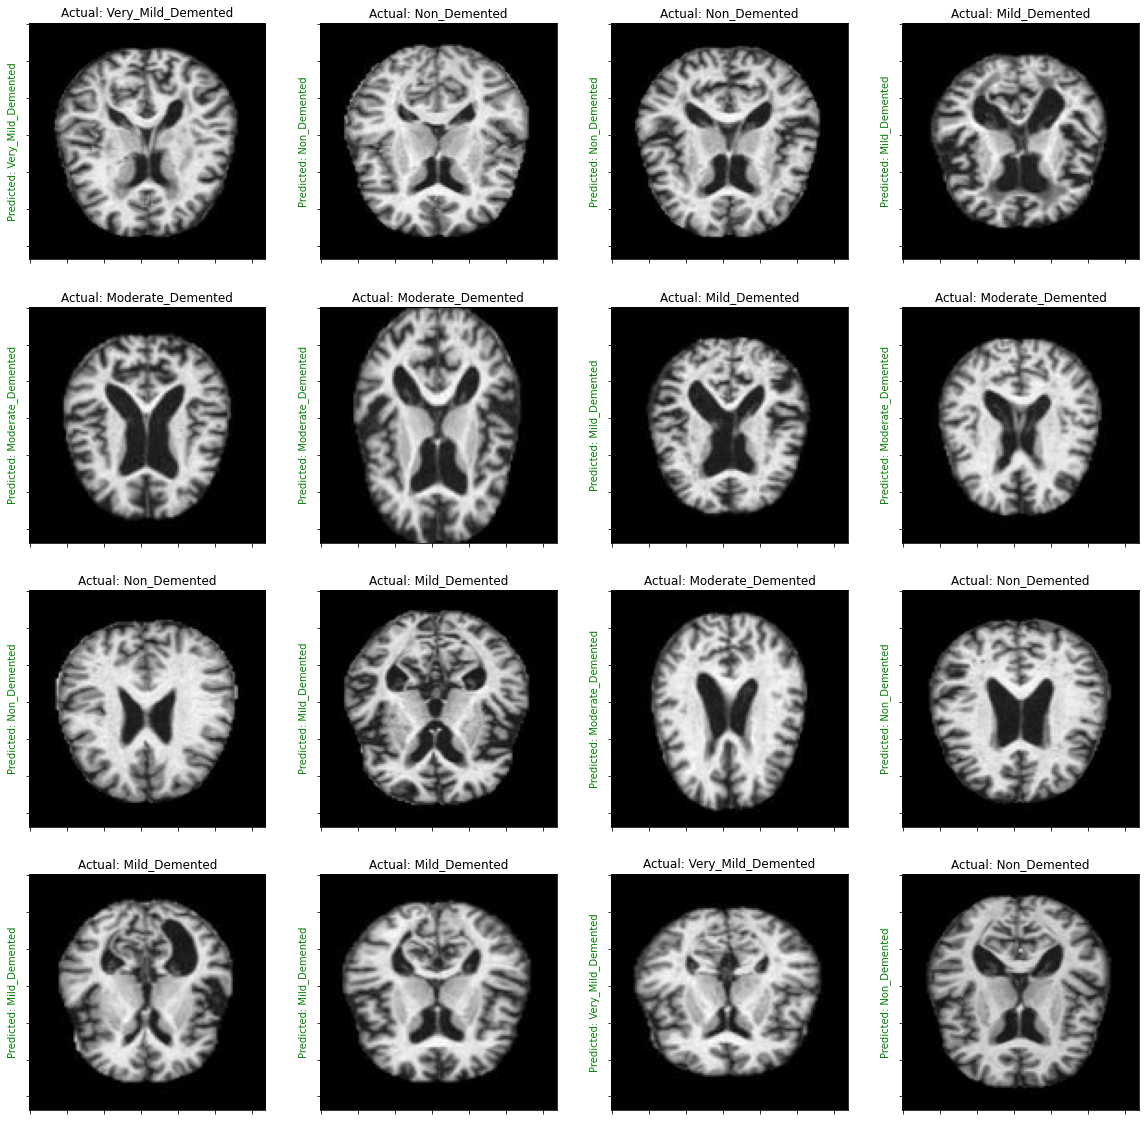

In [113]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model_2.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(classes[labels[i]]==classes[np.argmax(score)]):
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

#### VGG19 Model evaluation

In [98]:
loss, accuracy = vgg_model.evaluate(test_data)

33/33 [==============================] - 4s 122ms/step - loss: 0.1648 - accuracy: 0.9483


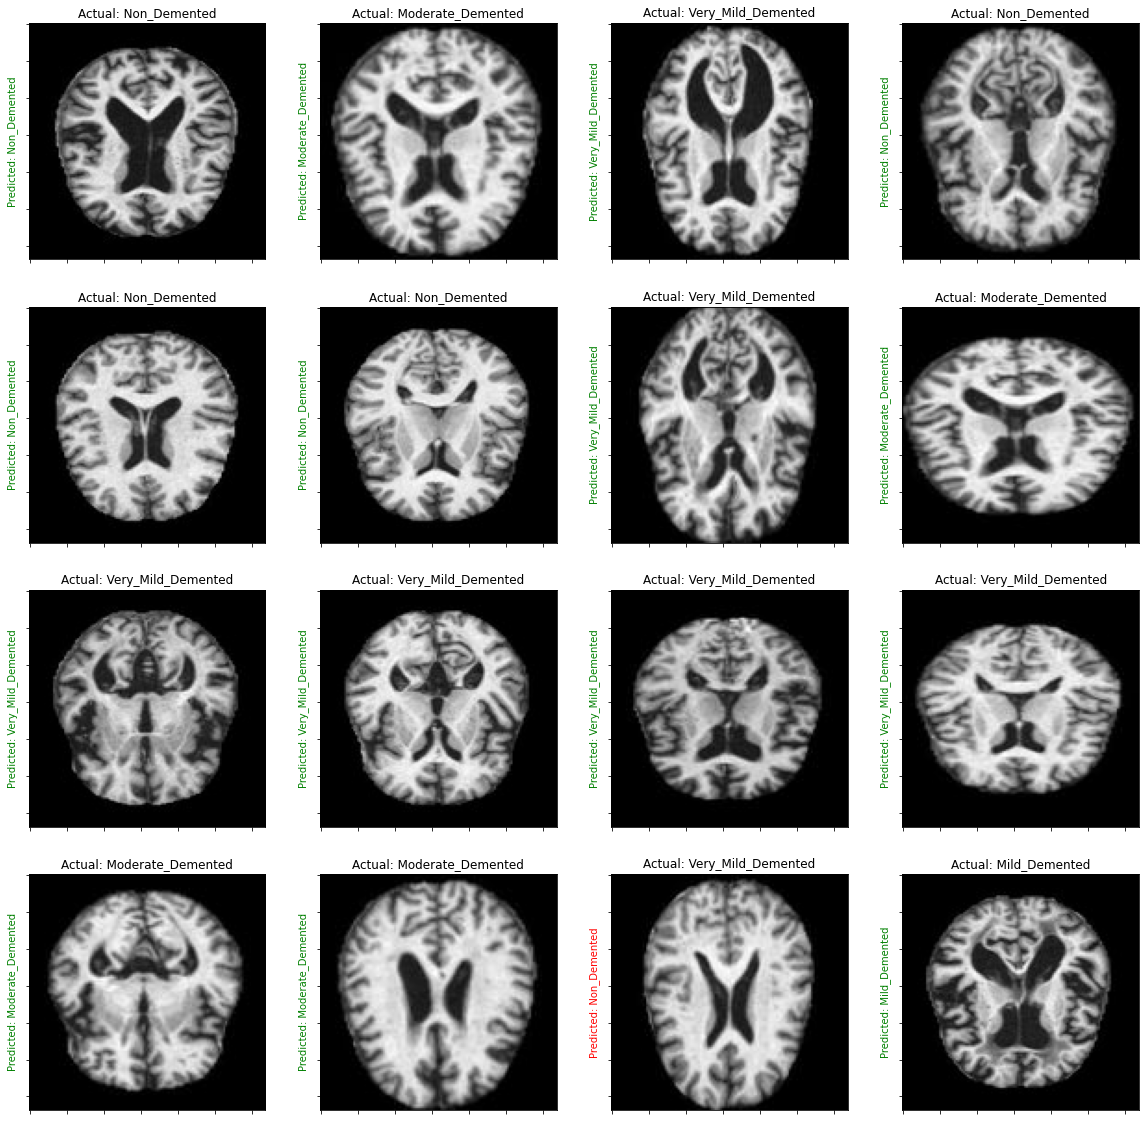

In [131]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = vgg_model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(classes[labels[i]]==classes[np.argmax(score)]):
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

#### Inception Model evaluation

In [77]:
loss, accuracy = inc_model.evaluate(test_data)

33/33 [==============================] - 3s 71ms/step - loss: 1.8475 - accuracy: 0.9865


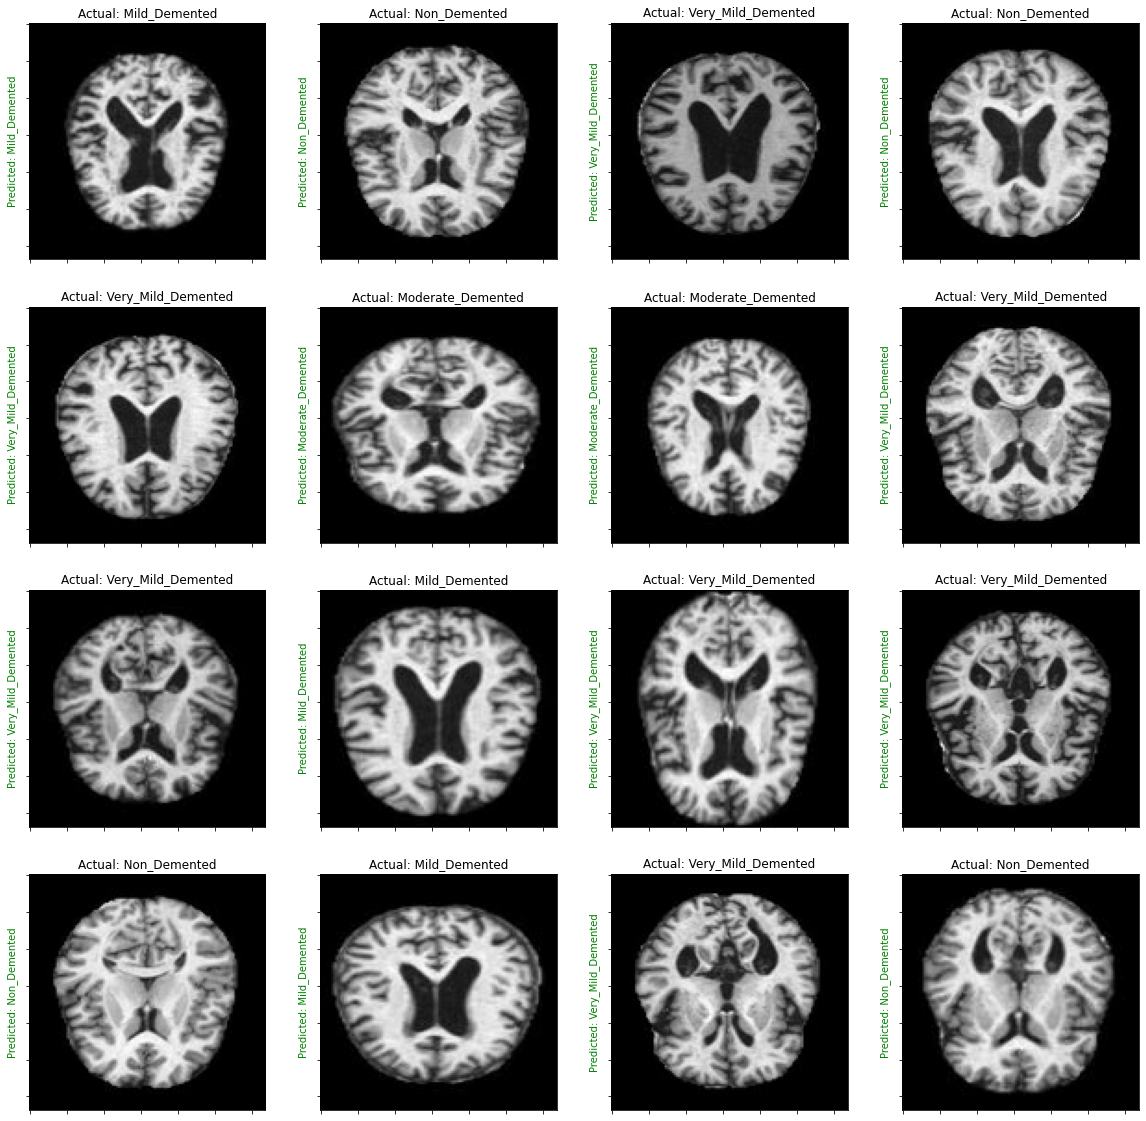

In [78]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = inc_model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(classes[labels[i]]==classes[np.argmax(score)]):
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+classes[labels[i]])
            plt.ylabel("Predicted: "+classes[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])